<a href="https://colab.research.google.com/github/sreelekshmyanil/DL-Assignments---VIT/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20MAI0017 SREELEKSHMY A**

https://github.com/sreelekshmyanil/DL-Assignments---VIT

**1. Recurrent Neural Network using LSTM**

RNNs are a powerful and robust type of neural network, and belong to the most promising algorithms in use because it is the only one with an internal memory.Because of their internal memory, RNN’s can remember important things about the input they received, which allows them to be very precise in predicting what’s coming next. This is why they're the preferred algorithm for sequential data like time series, speech, text, financial data, audio, video, weather and much more. Recurrent neural networks can form a much deeper understanding of a sequence and its context compared to other algorithms.

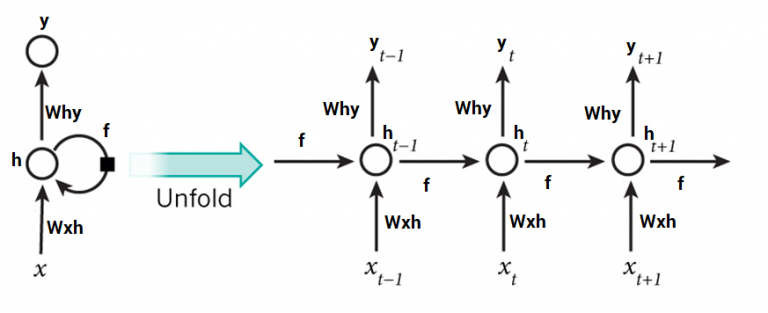

Now, even though RNNs are quite powerful, they suffer from Vanishing gradient problem which hinders them from using long term information, like they are good for storing memory 3-4 instances of past iterations but larger number of instances don't provide good results so we don't just use regular RNNs. Instead, we use a better variation of RNNs: Long Short Term Networks(LSTM).A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell is responsible for "remembering" values over arbitrary time intervals; hence the word "memory" in LSTM. Each of the three gates can be thought of as a "conventional" artificial neuron, as in a multi-layer (or feedforward) neural network: that is, they compute an activation (using an activation function) of a weighted sum. Intuitively, they can be thought as regulators of the flow of values that goes through the connections of the LSTM; hence the denotation "gate". There are connections between these gates and the cell.

**Dataset**

Stock market data can be interesting to analyze and as a further incentive, strong predictive models can have large financial payoff.  Here provided a dataset with historical stock prices (last 12 years) for 29 of 30 DJIA companies (excluding 'V' because it does not have the whole 12 years data).

In [ ]:
!unzip /content/drive/MyDrive/dataset_RNN.zip -d /content/drive/MyDrive/RNN_data

Archive:  /content/drive/MyDrive/dataset_RNN.zip
replace /content/drive/MyDrive/RNN_data/AABA_2006-01-01_to_2018-01-01.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/MyDrive/RNN_data/AABA_2006-01-01_to_2018-01-01.csv  
  inflating: /content/drive/MyDrive/RNN_data/AAPL_2006-01-01_to_2018-01-01.csv  
  inflating: /content/drive/MyDrive/RNN_data/AMZN_2006-01-01_to_2018-01-01.csv  
  inflating: /content/drive/MyDrive/RNN_data/AXP_2006-01-01_to_2018-01-01.csv  
  inflating: /content/drive/MyDrive/RNN_data/BA_2006-01-01_to_2018-01-01.csv  
  inflating: /content/drive/MyDrive/RNN_data/CAT_2006-01-01_to_2018-01-01.csv  
  inflating: /content/drive/MyDrive/RNN_data/CSCO_2006-01-01_to_2018-01-01.csv  
  inflating: /content/drive/MyDrive/RNN_data/CVX_2006-01-01_to_2018-01-01.csv  
  inflating: /content/drive/MyDrive/RNN_data/DIS_2006-01-01_to_2018-01-01.csv  
  inflating: /content/drive/MyDrive/RNN_data/GE_2006-01-01_to_2018-01-01.csv  
  inflating: /content/drive/MyDriv

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
#Plotting functions
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

**Predicting the price of stocks of IBM for the year 2017**

In [ ]:
# Loading Dataset
dataset = pd.read_csv('/content/drive/MyDrive/RNN_data/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
#Exploring Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.2+ KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


In [ ]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

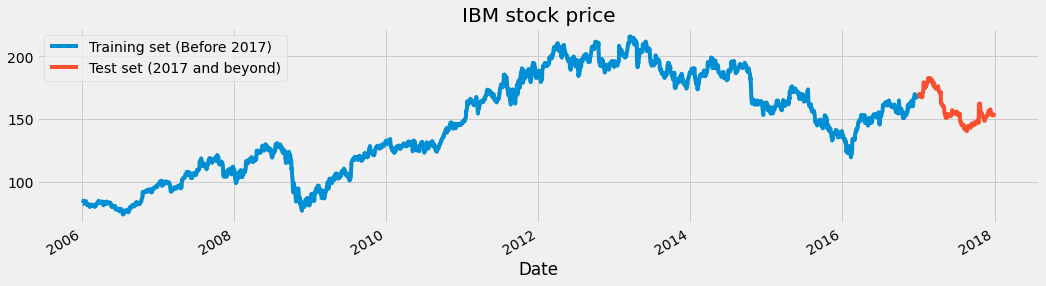

In [ ]:
# We have chosen 'High' attribute for prices.
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))


**Simple RNN**

In [ ]:
# The simple RNN architecture
rnn = Sequential()
# First SimpleRNN layer with Dropout regularisation
rnn.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn.add(Dropout(0.2))
# Second SimpleRNN layer
rnn.add(SimpleRNN(units=50, return_sequences=True))
rnn.add(Dropout(0.2))
# Third SimpleRNN layer
rnn.add(SimpleRNN(units=50, return_sequences=True))
rnn.add(Dropout(0.2))
# Fourth SimpleRNN layer
rnn.add(SimpleRNN(units=50))
rnn.add(Dropout(0.2))
# The output layer
rnn.add(Dense(units=1))

# Compiling the RNN
rnn.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
rnn.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 17s 137ms/step - loss: 0.5223
Epoch 2/50
85/85 [==============================] - 12s 138ms/step - loss: 0.1602
Epoch 3/50
85/85 [==============================] - 11s 135ms/step - loss: 0.0933
Epoch 4/50
85/85 [==============================] - 11s 132ms/step - loss: 0.0592
Epoch 5/50
85/85 [==============================] - 11s 134ms/step - loss: 0.0360
Epoch 6/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0205
Epoch 7/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0135
Epoch 8/50
85/85 [==============================] - 11s 135ms/step - loss: 0.0091
Epoch 9/50
85/85 [==============================] - 12s 135ms/step - loss: 0.0083
Epoch 10/50
85/85 [==============================] - 11s 133ms/step - loss: 0.0065
Epoch 11/50
85/85 [==============================] - 12s 136ms/step - loss: 0.0054
Epoch 12/50
85/85 [==============================] - 12s 136ms/step - loss: 0.0055
Epoch 13/50
8

**LSTM**

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 34s 14ms/step - loss: 0.0505
Epoch 2/50
85/85 [==============================] - 1s 12ms/step - loss: 0.0109
Epoch 3/50
85/85 [==============================] - 1s 12ms/step - loss: 0.0092
Epoch 4/50
85/85 [==============================] - 1s 13ms/step - loss: 0.0069
Epoch 5/50
85/85 [==============================] - 1s 12ms/step - loss: 0.0067
Epoch 6/50
85/85 [==============================] - 1s 13ms/step - loss: 0.0050
Epoch 7/50
85/85 [==============================] - 1s 12ms/step - loss: 0.0047
Epoch 8/50
85/85 [==============================] - 1s 13ms/step - loss: 0.0043
Epoch 9/50
85/85 [==============================] - 1s 13ms/step - loss: 0.0046
Epoch 10/50
85/85 [==============================] - 1s 13ms/step - loss: 0.0036
Epoch 11/50
85/85 [==============================] - 1s 13ms/step - loss: 0.0037
Epoch 12/50
85/85 [==============================] - 1s 12ms/step - loss: 0.0038
Epoch 13/50
85/85 [=================

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#RNN
predicted_stock_price_rnn = rnn.predict(X_test)
predicted_stock_price_rnn = sc.inverse_transform(predicted_stock_price_rnn)

In [ ]:
#LSTM
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1. USING SIMPLE RNN ------------


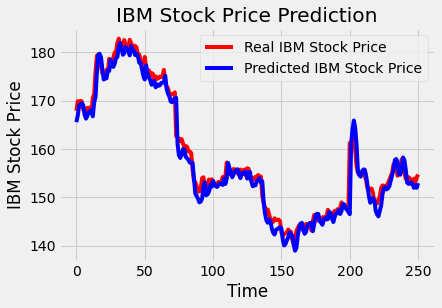

In [ ]:
# Visualizing the results for Simple RNN
print("1. USING SIMPLE RNN ------------")
plot_predictions(test_set,predicted_stock_price_rnn)

2. USING LSTM ------------


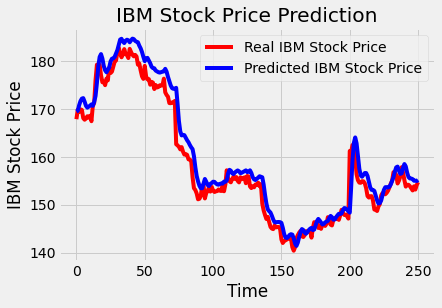

In [ ]:
# Visualizing the results for LSTM
print("2. USING LSTM ------------")
plot_predictions(test_set,predicted_stock_price)

In [ ]:
# Evaluating our model
print("1. USING SIMPLE RNN ------------")
return_rmse(test_set,predicted_stock_price_rnn)
print("\n")
print("2. USING LSTM ------------")
return_rmse(test_set,predicted_stock_price)

1. USING SIMPLE RNN ------------
The root mean squared error is 1.9751301489513713.


2. USING LSTM ------------
The root mean squared error is 2.8380622580483825.


_____________________________________________________________________________